In [31]:
import pandas as pd
import numpy as np 
from scipy.stats.stats import pearsonr, spearmanr
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from difflib import SequenceMatcher
%matplotlib inline

# Reading the input file
filename = 'Call Sample.csv'
csv_data = pd.read_csv(filename, encoding='utf-8')
csv_data.head()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,East,A,Brian,41,1,509.0,6.5
1,East,A,Brian,41,2,505.0,6.9
2,East,A,Brian,41,3,NaN,5.9
3,East,A,Brian,41,4,505.0,7.1
4,East,A,Brian,41,5,511.0,9.1


In [32]:
#Identifying missing values in the data
csv_data.isna()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False


In [33]:
# Data preprocessing: Replacing missing values with the column mean
csv_data['Service Time'].fillna((int(csv_data['Service Time'].mean())), inplace=True)
csv_data['Quality Score'].fillna((csv_data['Quality Score'].mean()), inplace=True)

print(csv_data.head())

   Site Client Supervisor  Agent  Week  Service Time  Quality Score
0  East      A      Brian     41     1         509.0            6.5
1  East      A      Brian     41     2         505.0            6.9
2  East      A      Brian     41     3         475.0            5.9
3  East      A      Brian     41     4         505.0            7.1
4  East      A      Brian     41     5         511.0            9.1


In [34]:
csv_data.describe()

,Agent,Week,Service Time,Quality Score
count,240.000000,240.000000,240.000000,240.000000
mean,24.500000,3.000000,475.120833,6.895299
std,13.882351,1.417169,39.497974,1.206823
min,1.000000,1.000000,402.000000,4.300000
25%,12.750000,2.000000,451.000000,5.900000
50%,24.500000,3.000000,475.000000,6.900000
75%,36.250000,4.000000,511.000000,7.700000
max,48.000000,5.000000,550.000000,9.300000


In [35]:
# Data cleaning: Step 1: Converting the names to lower case to handle cases like Andrew and ANDREW.
csv_data['Supervisor'] = csv_data['Supervisor'].str.lower()
print(csv_data['Supervisor'].value_counts())

eric         20
david        20
samantha     20
kathy        20
michael      20
julie        20
brian        20
george       20
andrew       19
sarah        19
jorge        19
john         19
sara          1
adreew        1
jorrge        1
johnathan     1
Name: Supervisor, dtype: int64


In [36]:
# Data cleaning Step 2: Handling human errors while manual entry
# One single entry with the name of Sara and 20 with the name of Sarah (all other attributes are the same):
# 1. Find similarity between the 2 names (Using SequenceMatcher). 
# 2. If similarity > 80% consider similar (similarity ratio: > 0.8)
# 3. Replace the name with only 1 occurrence with the similar name
# Note: This is done because the data is manually entered, hence there is room for error and the technique shoud accomodate it.
# print(csv_data['Supervisor'].value_counts(), type(csv_data['Supervisor'].value_counts()))
supervisor = csv_data['Supervisor'].value_counts()
names = supervisor[supervisor == 1].index # get all those names which have only one entry
print('Names::', names) 
for new_name in csv_data['Supervisor'].unique():
    for old_name in names:
        similarity = SequenceMatcher(None,old_name,new_name)
        if similarity.ratio() > 0.8 and similarity.ratio() != 1: # If similarity score > 0.8 replace the name that occurred only once 
            print('Similarity Scores for names:')
            print(old_name,new_name,round(similarity.ratio(),3))
            csv_data['Supervisor'] = csv_data['Supervisor'].replace(old_name,new_name)
csv_data['Supervisor'].unique()

Names:: Index(['sara', 'adreew', 'jorrge', 'johnathan'], dtype='object')
Similarity Scores for names:
jorrge jorge 0.909
Similarity Scores for names:
sara sarah 0.889
Similarity Scores for names:
adreew andrew 0.833


array(['brian', 'jorge', 'george', 'sarah', 'john', 'johnathan', 'kathy',
       'eric', 'samantha', 'andrew', 'david', 'julie', 'michael'],
      dtype=object)

In [37]:
# Data Transformation
# Label encoding for the Non-numeric data
label_encoder = preprocessing.LabelEncoder()
csv_data['Site'] = label_encoder.fit_transform(csv_data['Site'])
csv_data['Client'] = label_encoder.fit_transform(csv_data['Client'])
csv_data['Supervisor'] = label_encoder.fit_transform(csv_data['Supervisor'])
csv_data.head()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,0,0,1,41,1,509.0,6.5
1,0,0,1,41,2,505.0,6.9
2,0,0,1,41,3,475.0,5.9
3,0,0,1,41,4,505.0,7.1
4,0,0,1,41,5,511.0,9.1


In [38]:
#Data Preprocessing: Reducing number of bins for Quality Score 
#Earlier values for Quality Score: 6.5,6.3.3.9
#New values for Quality Score: 7,6,4 (Rounding off)
csv_data['Quality Score'] =  csv_data['Quality Score'].round(0).astype(int)
csv_data.head()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,0,0,1,41,1,509.0,6
1,0,0,1,41,2,505.0,7
2,0,0,1,41,3,475.0,6
3,0,0,1,41,4,505.0,7
4,0,0,1,41,5,511.0,9


In [39]:
header = csv_data.columns.tolist()
print(header)

['Site', 'Client', 'Supervisor', 'Agent', 'Week', 'Service Time', 'Quality Score']


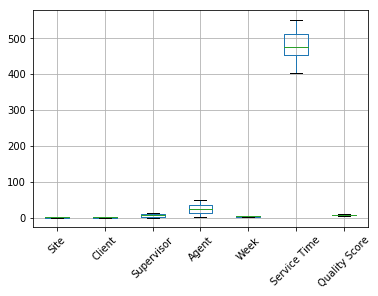

In [40]:
csv_data.boxplot(rot=45)

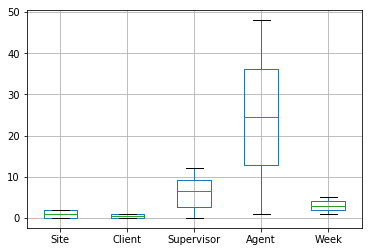

In [41]:
csv_data.boxplot(['Site', 'Client', 'Supervisor', 'Agent', 'Week'])

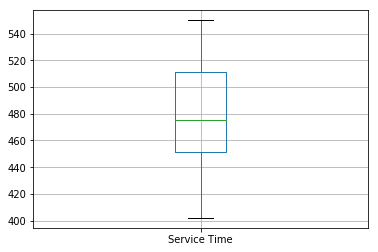

In [42]:
csv_data.boxplot(column='Service Time')

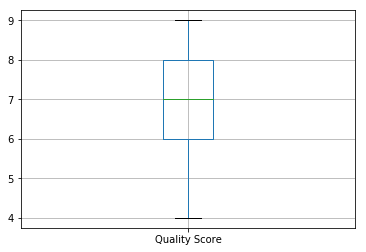

In [43]:
csv_data.boxplot(column='Quality Score')

In [44]:
corr = csv_data.corr()
print(corr)

                   Site    Client  Supervisor     Agent      Week  \
Site           1.000000  0.000000   -0.104843 -0.235753  0.000000   
Client         0.000000  1.000000    0.512553  0.144369  0.000000   
Supervisor    -0.104843  0.512553    1.000000 -0.310624  0.001513   
Agent         -0.235753  0.144369   -0.310624  1.000000  0.000000   
Week           0.000000  0.000000    0.001513  0.000000  1.000000   
Service Time   0.513734 -0.427601   -0.362699 -0.043957 -0.003887   
Quality Score -0.053037 -0.423054   -0.176980 -0.090291  0.501714   

               Service Time  Quality Score  
Site               0.513734      -0.053037  
Client            -0.427601      -0.423054  
Supervisor        -0.362699      -0.176980  
Agent             -0.043957      -0.090291  
Week              -0.003887       0.501714  
Service Time       1.000000      -0.027931  
Quality Score     -0.027931       1.000000  


In [45]:
csv_data.corr()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
Site,1.000000,0.000000,-0.104843,-0.235753,0.000000,0.513734,-0.053037
Client,0.000000,1.000000,0.512553,0.144369,0.000000,-0.427601,-0.423054
Supervisor,-0.104843,0.512553,1.000000,-0.310624,0.001513,-0.362699,-0.176980
Agent,-0.235753,0.144369,-0.310624,1.000000,0.000000,-0.043957,-0.090291
Week,0.000000,0.000000,0.001513,0.000000,1.000000,-0.003887,0.501714
Service Time,0.513734,-0.427601,-0.362699,-0.043957,-0.003887,1.000000,-0.027931
Quality Score,-0.053037,-0.423054,-0.176980,-0.090291,0.501714,-0.027931,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f5df3c8>,
      dtype=object)

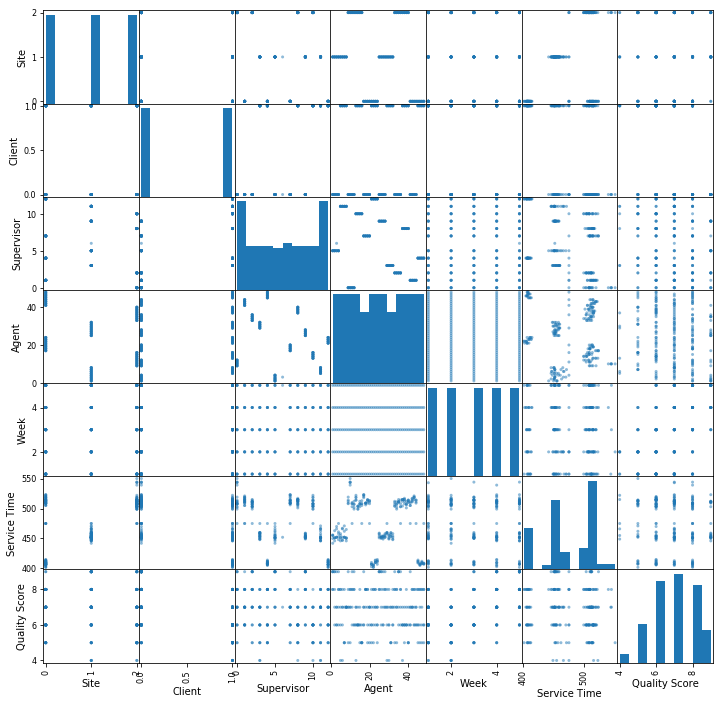

In [46]:
pd.plotting.scatter_matrix(csv_data.loc[:,:],figsize = (12,12))

In [47]:
csv_data.corr(method='spearman')

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
Site,1.000000,0.000000,-0.118258,-0.235753,0.000000,0.403596,-0.055815
Client,0.000000,1.000000,0.531063,0.144369,0.000000,-0.390605,-0.412129
Supervisor,-0.118258,0.531063,1.000000,-0.313624,0.000853,-0.391021,-0.173181
Agent,-0.235753,0.144369,-0.313624,1.000000,0.000000,0.028078,-0.095564
Week,0.000000,0.000000,0.000853,0.000000,1.000000,-0.018826,0.501491
Service Time,0.403596,-0.390605,-0.391021,0.028078,-0.018826,1.000000,-0.065737
Quality Score,-0.055815,-0.412129,-0.173181,-0.095564,0.501491,-0.065737,1.000000


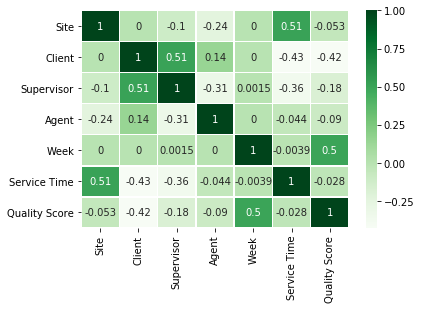

In [48]:
sns.heatmap(corr, annot=True, linewidths=.5, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="Greens")

In [49]:
csv_data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('PuBu'), axis=1)

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
Site,1.0,0.0,-0.1,-0.24,0.0,0.51,-0.053
Client,0.0,1.0,0.51,0.14,0.0,-0.43,-0.42
Supervisor,-0.1,0.51,1.0,-0.31,0.0015,-0.36,-0.18
Agent,-0.24,0.14,-0.31,1.0,0.0,-0.044,-0.09
Week,0.0,0.0,0.0015,0.0,1.0,-0.0039,0.5
Service Time,0.51,-0.43,-0.36,-0.044,-0.0039,1.0,-0.028
Quality Score,-0.053,-0.42,-0.18,-0.09,0.5,-0.028,1.0


In [50]:
csv_data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('PuBu'), axis=1)

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
Site,1.0,0.0,-0.12,-0.24,0.0,0.4,-0.056
Client,0.0,1.0,0.53,0.14,0.0,-0.39,-0.41
Supervisor,-0.12,0.53,1.0,-0.31,0.00085,-0.39,-0.17
Agent,-0.24,0.14,-0.31,1.0,0.0,0.028,-0.096
Week,0.0,0.0,0.00085,0.0,1.0,-0.019,0.5
Service Time,0.4,-0.39,-0.39,0.028,-0.019,1.0,-0.066
Quality Score,-0.056,-0.41,-0.17,-0.096,0.5,-0.066,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111515eb8>,
      dtype=object)

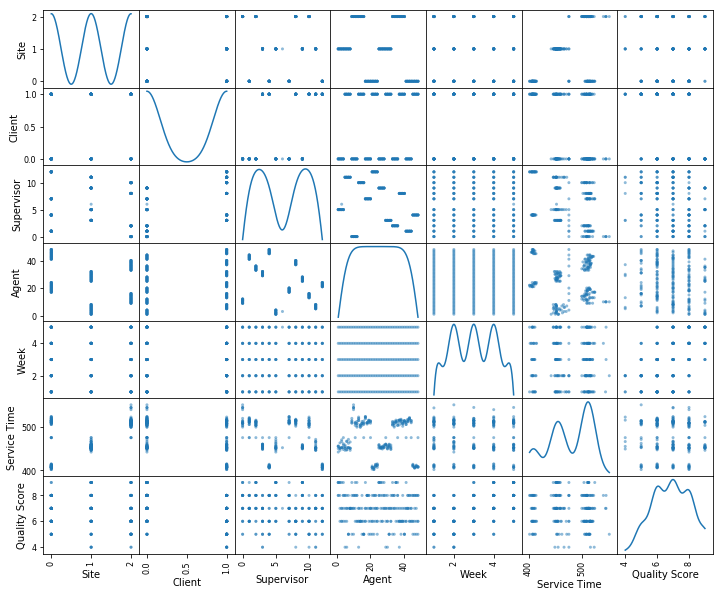

In [51]:
pd.plotting.scatter_matrix(csv_data.loc[:,:],figsize = (12,10), diagonal='kde', range_padding = 0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111110b70>,
      dtype=object)

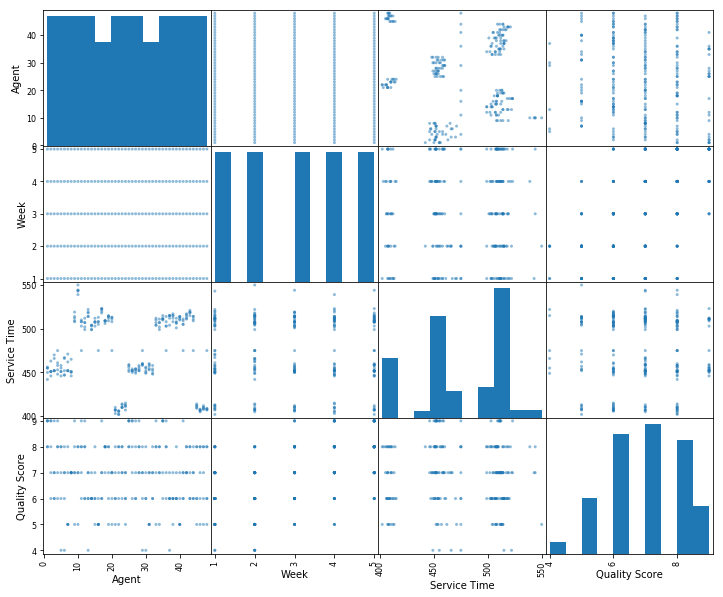

In [52]:
pd.plotting.scatter_matrix(csv_data.loc[:, 'Agent': 'Quality Score'],figsize = (12,10))

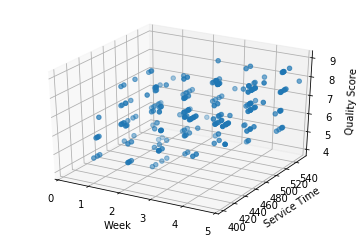

In [53]:
threeDplot = plt.figure().gca(projection='3d')
threeDplot.scatter(csv_data['Week'], csv_data['Service Time'], csv_data['Quality Score'])
threeDplot.set_xlabel('Week')
threeDplot.set_ylabel('Service Time')
threeDplot.set_zlabel('Quality Score')
plt.xlim(0,5)
plt.show()

In [54]:
csv_data['Quality Score'].unique()

array([6, 7, 9, 8, 5, 4])

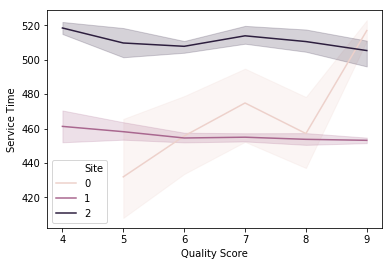

In [55]:
sns.lineplot( x="Quality Score", y="Service Time", data=csv_data, hue='Site', legend='full' )

(0, 5)

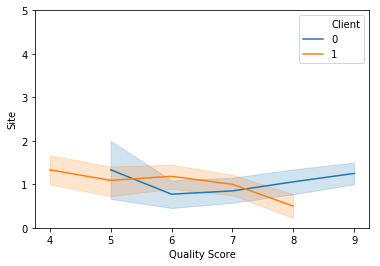

In [57]:
sns.lineplot( x="Quality Score", y="Site", data=csv_data, hue='Client', legend='full')
plt.ylim(0,5)

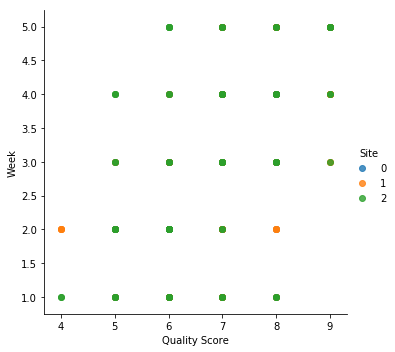

In [59]:
sns.lmplot( x="Quality Score", y="Week", data=csv_data, fit_reg=False, hue='Site', legend=True )

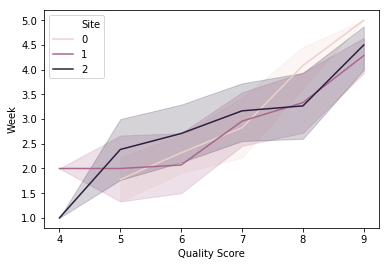

In [60]:
sns.lineplot( x="Quality Score", y="Week", data=csv_data, hue='Site', legend='full')

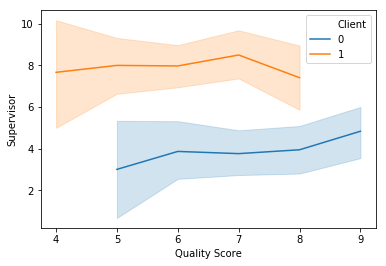

In [61]:
sns.lineplot( x="Quality Score", y="Supervisor", data=csv_data, hue='Client', legend='full')

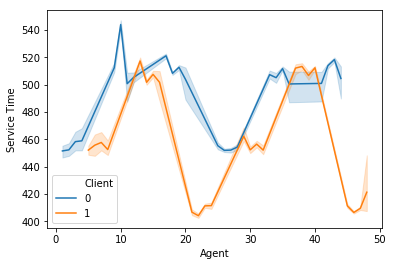

In [62]:
sns.lineplot( x="Agent", y="Service Time", data=csv_data, hue='Client', legend='full')

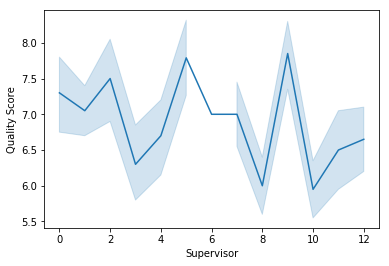

In [63]:
sns.lineplot( x="Supervisor", y="Quality Score", data=csv_data, legend='full')

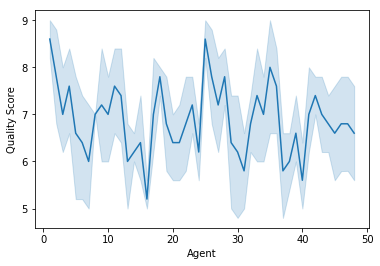

In [64]:
sns.lineplot( x="Agent", y="Quality Score", data=csv_data, legend='full')

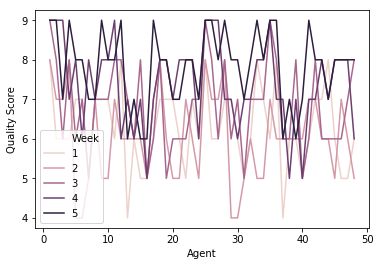

In [65]:
sns.lineplot( x="Agent", y="Quality Score", data=csv_data,hue='Week', legend='full')

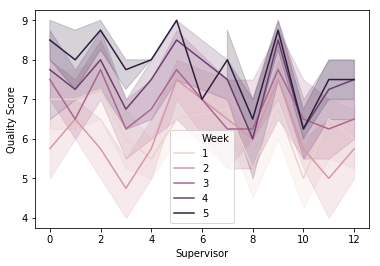

In [66]:
sns.lineplot( x="Supervisor", y="Quality Score", data=csv_data,hue='Week', legend='full')

In [67]:
csv_data['Supervisor'].unique()

array([ 1,  7,  4, 12,  5,  6,  9,  3, 11,  0,  2,  8, 10])

In [68]:
csv_data['Agent'].unique()

array([41, 42, 43, 44, 17, 18, 19, 20, 45, 46, 47, 48, 21, 22, 23, 24,  1,
        2,  3,  4, 25, 26, 27, 28, 29, 30, 31, 32,  5,  6,  7,  8, 11,  9,
       10, 12, 33, 34, 35, 36, 37, 38, 39, 40, 13, 14, 15, 16])

In [69]:
csv_data['Week'].unique()

array([1, 2, 3, 4, 5])

In [70]:
csv_data['Quality Score'].unique()

array([6, 7, 9, 8, 5, 4])

In [71]:
csv_data.head()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,0,0,1,41,1,509.0,6
1,0,0,1,41,2,505.0,7
2,0,0,1,41,3,475.0,6
3,0,0,1,41,4,505.0,7
4,0,0,1,41,5,511.0,9


In [72]:
bins = [350,476,600]
csv_data['Service Time'] = np.searchsorted(bins, csv_data['Service Time'].values)

bins_qs = [0,7,10]
csv_data['Quality Score'] = np.searchsorted(bins_qs, csv_data['Quality Score'].values)
csv_data.head() 
csv_data.to_csv('ServiceTimeBinaryBothFinal.csv', index=False)

In [73]:
csv_data.head() 


,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,0,0,1,41,1,2,1
1,0,0,1,41,2,2,1
2,0,0,1,41,3,1,1
3,0,0,1,41,4,2,1
4,0,0,1,41,5,2,2
